In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import codecs
import re
import string
import numpy as np

from nltk.stem import RSLPStemmer             
from nltk.tokenize import TweetTokenizer   
from tqdm import tqdm
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import model_selection

import nltk 
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucca\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [2]:
bossa_nova_df = pd.read_csv("data/bossa_nova.csv")
funk_df = pd.read_csv("data/funk.csv")
gospel_df = pd.read_csv("data/gospel.csv")
sertanejo_df = pd.read_csv("data/sertanejo.csv")
sertanejo_df

,lyric
0,\nSer feliz pra mim não custa caro\nSe você t...
1,"\nMãe, hoje eu descobri que eu cresci\nÉ que ..."
2,\nAí você escolhe a melhor roupa\nAí você arr...
3,"\nOi, tudo bem?\nQue bom te ver\nA gente fico..."
4,\nSó vim me desculpar\nEu não vou demorar\nNã...
...,...
795,\nA luta chegou de repente\nE te colocou fren...
796,\nPara de mentir pra você mesmo\nSeu amor por...
797,\nQuadros nunca esquecem e sempre contarão\nO...
798,\nVoltei era de madrugada e me assustei\nAs l...


In [3]:
bossa_nova_df["lyric"][0]

' \nEu sei que vou te amar\nPor toda a minha vida eu vou te amar\nEm cada despedida eu vou te amar\nDesesperadamente, eu sei que vou te amar\nE cada verso meu será\nPra te dizer que eu sei que vou te amar\nPor toda minha vida\nEu sei que vou chorar\nA cada ausência tua eu vou chorar\nMas cada volta tua há de apagar\nO que esta ausência tua me causou\nEu sei que vou sofrer a eterna desventura de viver\nA espera de viver ao lado teu\nPor toda a minha vida '

<AxesSubplot: title={'center': 'Contagem de Músicas por Gênero'}>

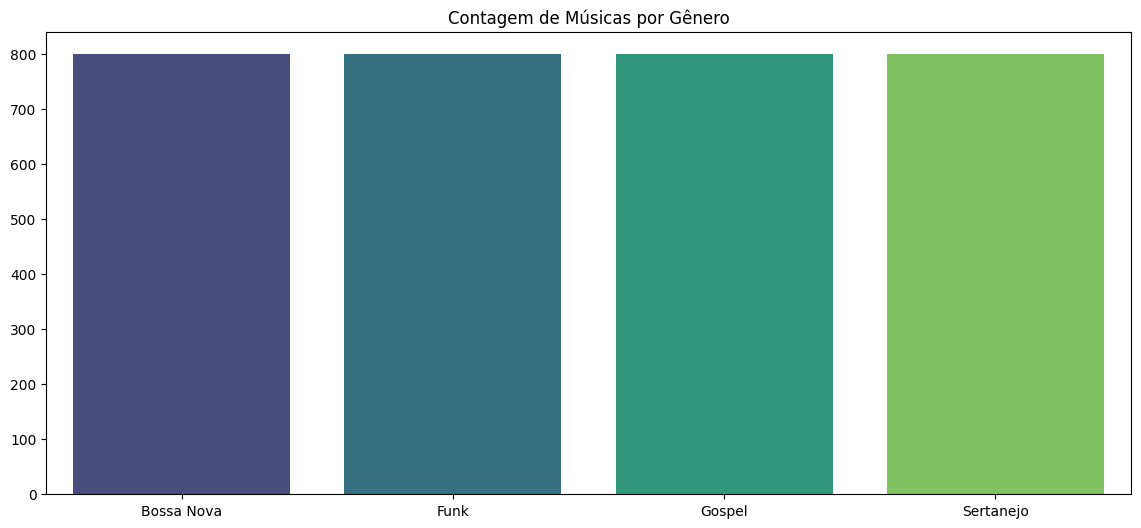

In [4]:
song_count = pd.DataFrame({"Bossa Nova":[len(bossa_nova_df)], "Funk":[len(funk_df)], "Gospel":[len(gospel_df)], "Sertanejo":[len(sertanejo_df)]})
plt.figure(figsize=(14,6))
plt.title("Contagem de Músicas por Gênero")
sns.barplot(data=song_count,palette="viridis")

In [5]:
bossa_nova_df["lyric"][len(bossa_nova_df)-1]

" \nIn my loneliness \nWhen you're gone and I'm all by muself \nAnd I need your caress \nI just think of you \nAnd the thought of you holding me near \nMakes my loneliness soon disappear \nThough you're far away \nI have only to close my eyes \nAnd you are back to stay \nI just close my eyes \nAnd the sadness that missing you brings \nSoon is gone and this heart of mine sings \nYes I love you so \nAnd that for me is all I need to know \nI will wait for you \nTil the sun falls from out of the sky \nFor what else can I do \nI will wait for you meditating \nHow sweet life will be \nWhen you come back to me "